In [71]:
import sys
import cantera as ct
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

import phases
import feedstock as fs
import fuel as fu
import energy as en
import gasifier as gs

In [72]:
sorghum = fs.create_fuel_stream(1, [42.29, 5.74, 37.32, 0.42, 0.07, 0], 0.1416, 0, 19.58)
woodChips = fs.create_fuel_stream(1, [48.32, 6.62, 44.58, 0.14, 0.32, 0], 0.0093, 0, 17.52)
dairyManure = fs.create_fuel_stream(1, [32.8, 2.48, 24.46, 4.16, 0.21, 0], 0.359, 0, 12.3)

air1 = fs.create_air_from_ER(sorghum, 0.35)
air2 = fs.create_air_from_ER(woodChips, 0.35)
air3 = fs.create_air_from_ER(dairyManure, 0.35)

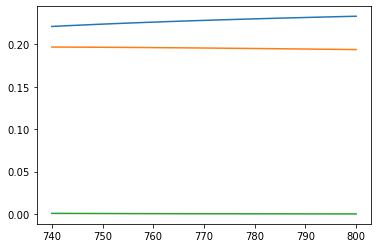

In [73]:
TT = np.arange(740, 800+1E-6, 1) # °C
CO = np.zeros_like(TT)
H2 = np.zeros_like(TT)
CH4 = np.zeros_like(TT)
HV = np.zeros_like(TT)

for i, t in enumerate(TT):
    outlet = gs.gasify_isot(sorghum, air1, t+273.15)
    CO[i] = outlet.get_syngas_fraction('CO')
    H2[i] = outlet.get_syngas_fraction('H2')
    CH4[i] = outlet.get_syngas_fraction('CH4')
    HV[i] = outlet.get_syngas_hhv('vol', water=True, nitrogen=True)

plt.plot(TT, CO)
plt.plot(TT, H2)
plt.plot(TT, CH4)
plt.show()

In [74]:
char_params = np.array([-111.1574, 3.9705, 0.0362, -7.1958, 3.0419, 1.2430, 0.1276, 1.1034, 1.4281])
methane_params = np.array([16.5264, 0.4982, -0.0304, 0.1739, 0.2148, -0.1864, -0.1186, -0.2192, -0.2552])

def char(ER, MC, T, C, H, O, ash):
    a = lambda i: char_params[i]
    return np.exp(a(0) + a(1)*ER + a(2)*MC + a(3)*((10**(-3))*T) + a(4)*((10**(-3))*T)**2 + a(5)*C + a(6)*H + a(7)*O +a(8)*ash)

def met(ER, MC, T, C, H, O, ash):
    b = lambda i: methane_params[i]
    return np.exp(b(0) + b(1)*ER + b(2)*MC + b(3)*((10**(-3))*T) + b(4)*((10**(-3))*T)**2 + b(5)*C + b(6)*H + b(7)*O +b(8)*ash)

0.012879472665705582
0.01287625376597835
0.01287317580352923
0.012870236063134045
0.012867431880560047
0.012864760641346024
0.012862219781434744
0.012859806786089471
0.012857519188476694
0.012855354569990233
0.012853310559345155
0.012851384830174737
0.012849575102160622
0.01284787914032154
0.012846294755514225
0.012844819800537286
0.012843452171297556
0.01284218980591514
0.012841030684218152
0.012839972826579919
0.012839014293747304
0.012838153185669212
0.012837387641814349
0.012836715840502213
0.012836135993419387
0.01283564635318461
0.012835245207207198
0.012834930878348678
0.012834701724303232
0.012834556137074382
0.012834492541823487
0.01283450939703013
0.012834605193339012
0.01283477845264144
0.01283502772926135
0.012835351607234232
0.012835748699398467
0.012836217649873638
0.012836757129670147
0.012837365839298218
0.012838042507421304
0.012838785887162025
0.012839594760628925
0.012840467935378129
0.012841404244336078
0.01284240254511342
0.012843461720170049
0.012844580675791228
0

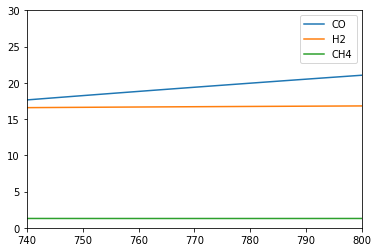

In [75]:
TT = np.arange(740, 800+1E-6, 1) # °C
CO = np.zeros_like(TT)
H2 = np.zeros_like(TT)
CH4 = np.zeros_like(TT)
HV = np.zeros_like(TT)

for i, t in enumerate(TT):
    ch = 1 - (0.1007 + 0.0011*t)
    mt = met(0.35, 0, t+273.15, 42.29, 5.74, 37.32, 14.16)
    outlet = gs.gasify_isot(sorghum, air1, t+273.15, charFormation=ch,  directMethaneConv=mt)
    CO[i] = outlet.get_syngas_fraction('CO')
    H2[i] = outlet.get_syngas_fraction('H2')
    CH4[i] = outlet.get_syngas_fraction('CH4')
    print(CH4[i])
    HV[i] = outlet.get_syngas_hhv('vol', water=True, nitrogen=True)

plt.plot(TT, CO*100, label='CO')
plt.plot(TT, H2*100, label='H2')
plt.plot(TT, CH4*100, label='CH4')
plt.xlim(TT[0], TT[-1])
plt.ylim(0, 30)
plt.legend()
plt.show()